# My First Supervised Learning Algorithm:  The Perceptron
## Billy Barbaro
## 15 February 2018

# Overview

* Problem
* Data
* Perceptrons
* Pitfalls
* Neural Networks

# Toolbox

* python
* numpy
* matplotlib & pyplot

# Problem

![TidePods](https://www.trend-chaser.com/wp-content/uploads/sites/7/2016/12/laundrypods.jpg)

In [1]:
# 50 instances
with open("training_data.csv") as f:
    for i in range(6): print(f.readline(), end="")
    for i in range(3): print('.')

transparancy (%),weight (g),label
83.70585723755893,16.628508861212243,1
8.581391160839988,95.54688758818536,-1
33.42901241708153,32.44385426897139,1
29.212901059937003,94.42851498860196,-1
1.6102321944556295,60.8011699109335,-1
.
.
.


In [2]:
# 20 instances
with open("test_data.csv") as f:
    for i in range(6): print(f.readline(), end="")
    for i in range(3): print('.')

transparancy (%),weight (g)
90.22102929999961,58.518355747077194
32.86057651829303,67.75144094121725
23.295384808234026,32.43404153421816
58.913270027518166,13.21564380158129
89.11050264041657,28.748116166624595
.
.
.


In [3]:
# 20 Labels
with open("test_labels.csv") as f:
    for i in range(6): print(f.readline(), end="")
    for i in range(3): print('.')

label
candy
pod
candy
candy
candy
.
.
.


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def make_plot(instances, labels=[]):
    colors = 'black' if labels is None else ['blue' if label == 1 else 'red' for label in labels]
    for i in range(len(instances) - len(labels)): colors.append('black')
    plt.scatter(instances[:, 0], instances[:, 1], c=colors)
    plt.ylabel('Weight (g)')
    plt.xlabel('Transparancy (%)')

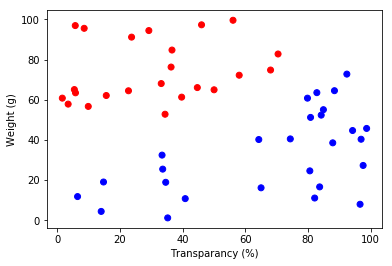

In [5]:
full_data = np.genfromtxt('training_data.csv', delimiter=',', skip_header=1)
instances, labels  = full_data[:, :2], full_data[:, 2]
make_plot(instances, labels)

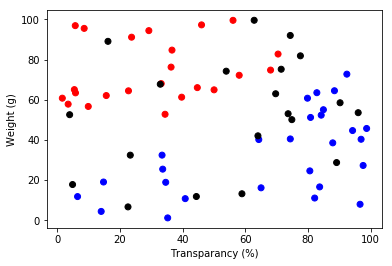

In [6]:
test_instances = np.genfromtxt('test_data.csv', delimiter=',', skip_header=1)
make_plot(np.vstack((instances, test_instances)), labels)

# Standard Form of a Line

## $Ax + By = C$
## $D*1 + Ax + By = 0$
## $w_0x_0 + w_1x_1 + w_2x_2 + ... = 0$


In [7]:
def plot_decision_boundary(weights, include_test_points=False, instances=instances, labels=labels, test_instances=test_instances):
    make_plot(np.vstack((instances, test_instances)), labels) if include_test_points else make_plot(instances, labels)
    x = np.linspace(0,100,100)
    y = (weights[1] * x + weights[0]) / -weights[2]
    plt.plot(x, y)
    axes = plt.gca()
    axes.set_xlim([-2,102])
    axes.set_ylim([-2,102])

## $1x_1 - 1x_2 = 0$

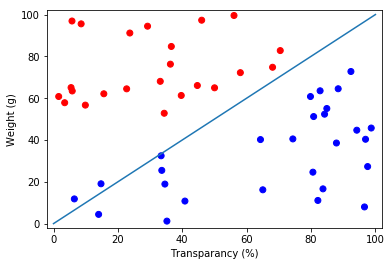

In [8]:
plot_decision_boundary([0, 1, -1])

## $20 + 1x_1 - 1x_2 = 0$

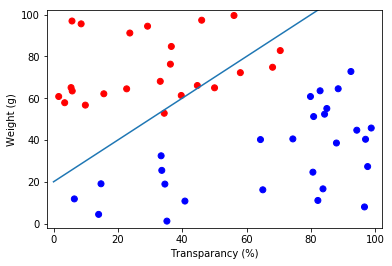

In [9]:
plot_decision_boundary([20, 1, -1])

## $20+0.6x_1-1x_2 = 0$

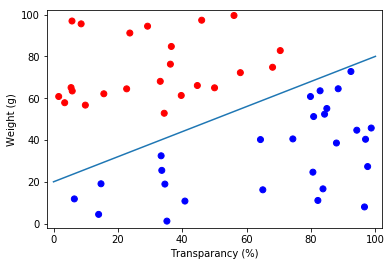

In [10]:
plot_decision_boundary([20, 0.6, -1])

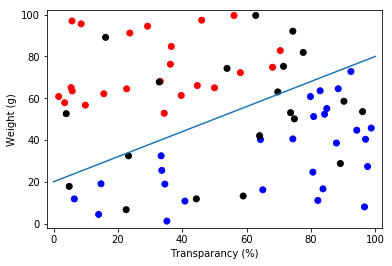

In [11]:
plot_decision_boundary([20, 0.6, -1], include_test_points=True)

In [12]:
class HandPickedPerceptron:
    def __init__(self, weights):
        self.weights = weights
    
    def _sign(self, number):
        return 1 if number >= 0 else -1
    
    def classify(self, instance):
        total = 0
        for i in range(len(self.weights)):
            total += self.weights[i] * instance[i]
        return self._sign(total)

In [13]:
p = HandPickedPerceptron([20, 0.6, -1])
print(p.classify([1, 90, 58]))
print(p.classify([1, 20, 60]))

1
-1


![AllDone](https://media.giphy.com/media/26u4lOMA8JKSnL9Uk/giphy.gif)

# Vectors

\begin{equation}
\begin{bmatrix}
    w_0 \\
    w_1 \\
    w_2 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    1 \\
    Transparency \\
    Weight \\
\end{bmatrix}
\end{equation}

![Perceptron](Perceptron.pdf)

# The Algorithm
1. Classify
2. Calculate Loss
3. Update
4. Repeat

In [23]:
class Perceptron:
    def __init__(self):
        np.random.seed(42)
        initial_weights = np.random.randn(3)
        self.weights = list(initial_weights)
        
    def _clamp(self, n, smallest, largest):
        return max(smallest, min(n, largest))
    
    def classify(self, instance):
        return self._clamp(np.dot(self.weights, instance), -1, 1)

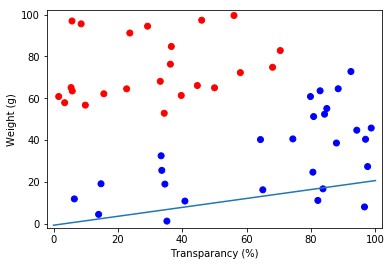

In [24]:
p = Perceptron()
plot_decision_boundary(p.weights)

# Calculating Loss

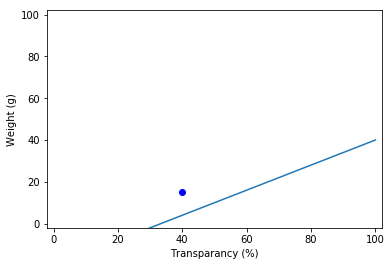

In [25]:
p = HandPickedPerceptron([-20, 0.6, -1])
instance, label  = [1, 40, 15], 1
plot_decision_boundary(p.weights, instances=np.array([instance[1:]]), labels=[label])

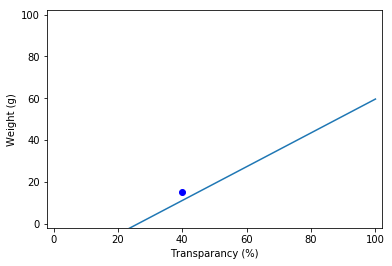

In [26]:
instance, label  = [1, 40, 15], 1
prediction = p.classify(instance)
loss = label - prediction
weights = list(p.weights)
for i in range(3):
        weights[i] = weights[i] + instance[i] * loss * 0.002
plot_decision_boundary(weights, instances=np.array([instance[1:]]), labels=[label])

In [27]:
class Perceptron:
    def __init__(self):
        np.random.seed(42)
        initial_weights = np.random.randn(3)
        self.weights = list(initial_weights)
    
    def _clamp(self, n, smallest, largest):
        return max(smallest, min(n, largest))
    
    def classify(self, instance):
        return self._clamp(np.dot(self.weights, instance), -1, 1)

    def update_weights(self, loss, instance):
        for i in range(3):
            self.weights[i] = self.weights[i] + loss * instance[i] * 0.00001

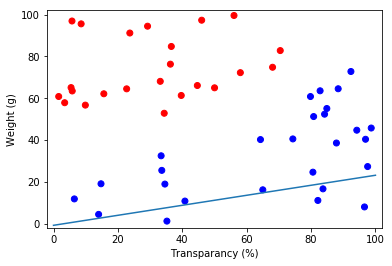

In [28]:
p = Perceptron()
for instance, label in zip(instances, labels):
    instance = [1] + list(instance)
    prediction = p.classify(instance)
    current_loss = label - prediction
    p.update_weights(current_loss, instance)
    
plot_decision_boundary(p.weights)

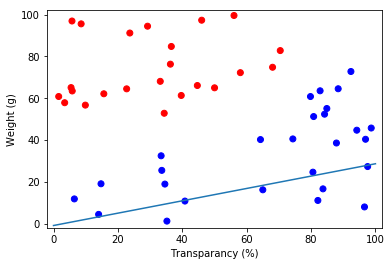

In [29]:
p = Perceptron()
for _ in range(3):
    for instance, label in zip(instances, labels):
        instance = [1] + list(instance)
        prediction = p.classify(instance)
        current_loss = label - prediction
        p.update_weights(current_loss, instance)
    
plot_decision_boundary(p.weights)

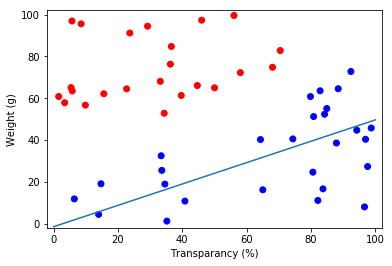

In [30]:
p = Perceptron()
for _ in range(10):
    for instance, label in zip(instances, labels):
        instance = [1] + list(instance)
        prediction = p.classify(instance)
        current_loss = label - prediction
        p.update_weights(current_loss, instance)
    
plot_decision_boundary(p.weights)

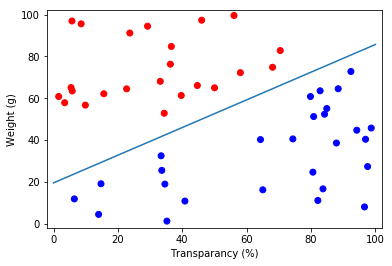

In [31]:
p = Perceptron()
for _ in range(30):
    for instance, label in zip(instances, labels):
        instance = [1] + list(instance)
        prediction = p.classify(instance)
        current_loss = label - prediction
        p.update_weights(current_loss, instance)
    
plot_decision_boundary(p.weights)

In [34]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [75]:
class Perceptron:
    def __init__(self, random_seed=42, max_iterations=10000):
        np.random.seed(random_seed)
        self.weights = np.random.randn(3)
        self.max_iterations = max_iterations
        
    def _clamp(self, n, smallest, largest):
        return max(smallest, min(n, largest))
    
    def classify(self, instance):
        return self._clamp(np.dot(self.weights, instance), -1, 1)
    
    def train(self, instances, labels):
        instances, labels = np.array(instances), np.array(labels) # Avoid mutating arguments
        for i in range(self.max_iterations):
            instances, labels = unison_shuffled_copies(instances, labels)
            total_loss = 0
            for instance, label in zip(instances, labels):
                instance = np.array([1] + list(instance))
                prediction = self.classify(instance)
                current_loss = label - prediction
                self.update_weights(current_loss, instance)
                total_loss += current_loss
            if total_loss == 0:
                break

    def update_weights(self, loss, instance):
        self.weights += instance * loss * 0.000001

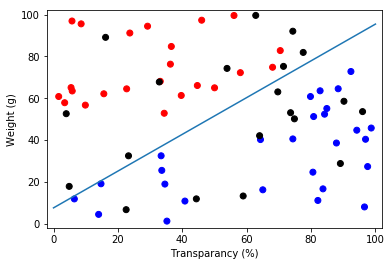

In [76]:
p = Perceptron()
p.train(instances, labels)
plot_decision_boundary(p.weights, include_test_points=True)

In [66]:
with open("test_labels.csv") as f:
    f.readline() # Skip the Header
    print('Prediction\tActual')
    for instance in test_instances:
        instance = [1] + list(instance)
        prediction = 'candy' if p.classify(instance) >= 0 else 'pod'
        label = f.readline()
        if not prediction in label:
            prediction = "\x1b[31m{}\x1b[0m".format(prediction)  # Color red if incorrect
        print('{}\t\t{}'.format(prediction, label), end="")

Prediction	Actual
candy		candy
pod		pod
pod		candy
candy		candy
candy		candy
pod		pod
candy		candy
pod		pod
pod		candy
candy		candy
candy		candy
pod		pod
pod		pod
candy		pod
pod		pod
pod		pod
candy		candy
candy		candy
pod		pod
candy		candy


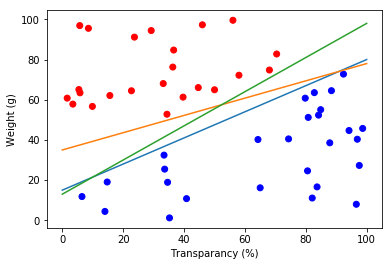

In [40]:
make_plot(instances, labels)
plt.plot([0, 100], [15, 80])
plt.plot([0, 100], [35, 78])
plt.plot([0, 100], [13, 98])

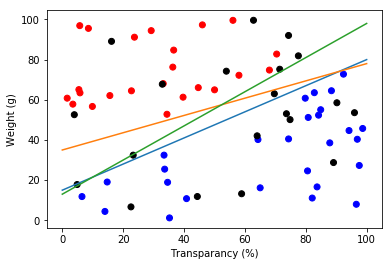

In [41]:
make_plot(np.vstack((instances, test_instances)), labels)
plt.plot([0, 100], [15, 80])
plt.plot([0, 100], [35, 78])
plt.plot([0, 100], [13, 98])
plt.ylabel('Weight (g)')
plt.xlabel('Transparancy (%)')

# Summary
* Data
* Algorithm
  * Classify
  * Loss
  * Update
* Testing Performance
* Now a little on NNs

![genPerceptron](GeneralPerceptron.pdf)

![NN](NN.pdf)

![CottonCandy](https://i.imgflip.com/22vdeb.jpg)